<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/02_distributions_5721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biochem 5721 -- Reading data and analyzing distributions

## Ensemble properties from averaging of large ensembles
<img  align="right" src="https://raw.githubusercontent.com/mpfoster/Biochem5721/master/images/kinesin-cartoon.png" alt="Kinesin" width="500"/>

* We saw in Video 1 that molecular motors walking on microtubules are responsible for morphological changes in a cell, and for enabling cell division. In the case of kinesin, we envision a dimeric molecule that makes stepping motions as ATP in the microtubule binding domains is hydrolyzed to ADP, dicusing a conformational change. 
* We also saw that single-molecule fluorecent methods could be used to visualize the movement of individual kinesin molecules on microtubules.
* Important questions about molecular motor function include:
  1. How fast can these motors travel?
  1. Do they move by a _stepping_ motion, or more like an _inch-worm_?
  1. How far do they move in a single stroke?
  1. How efficient is the motor (how many steps per ATP hydrolyzed) per step or per nm?
  1. How processive is it (how often does it fall off)?

* Biochemists have long studied these and related questions using traditional _ensemble_ approaches, which measure the **average** overall behavior of _many, many_ molecules (~10<sup>-12</sup> mol ~10<sup>11</sup> molecules).
* The accuracy and precision of those measurements depends on the sensitivity of the available technology, but also on intrinsict variability of the molecules themselves.


# Single molecule methods reveal variation within the ensemble.
* Highly sensitive single molecule fluorescence techniques allow measurement of the position of indivisual molecules (esp. TIRF microscopy, Total Internal Reflectance). 
<img src="https://raw.githubusercontent.com/mpfoster/Biochem5721/master/images/myosin-stepping.png" width=800>
* In single molecule experiments using another motor, myosin, 
Yildiz _et al._(2003) _Science_ 300(5628):pp. 2061-2065, DOI: 10.1126/science.1084398 (https://science-sciencemag-org.proxy.lib.ohio-state.edu/content/300/5628/2061) achieved high spatial resolution by immobilizing actin substrates (for example by stretching it between two small particles), and then observing the position of a fluorescent tag attached to one of the myosin "legs". A representative movie can be found at [this link](https://raw.githubusercontent.com/mpfoster/Biochem5721/master/images/myosin-time-course.mov). (A video describing this and related research is here: https://www.youtube.com/watch?v=MKlyi4euq50) 


<img  align="right" alt="Stepping Plot" src="https://raw.githubusercontent.com/mpfoster/Biochem5721/master/images/myosin-step-plot.png" width=600>

* By measuring the positions of individual molecules over time, the authors were able to measure the movements of individual myosin dimers (3 shown in the plot)
* Step sizes were measured for 32 molecules for a total of 231 steps over ~100s
* Step sizes were binned and plotted as a histogram (number of steps of a given length) 

### _Observations?_ 
### _Conclusions?_
<!-- 
Obs:
1. Average step size ~74 nm, not inching; stdev = 5 nm
2. range of step sizes was ~30 nm (60-90)
3. Distribution looks more or less Gaussian (normal distribution)

Conclusions:
1. Step-size is ~2x translocation, so stepping
2. Step size is not uniform, or constant!
3. Normal distribution suggests a relatively simple thermodynamic explanation for the variation in step size
 -->



## Chemical shift data

<img  align="right" src="http://www.bmrb.wisc.edu/metabolomics/standards/5_Hydroxy_L_tryptophan/lit/439280.png" alt="Trp" width="200"/>
NMR chemical shifts are sensitive to the local chemical environment. For a tryptophan (Trp) residue in a protein, the chemical shift of the H indole proton H$\epsilon$<sup>1</sup> is generally well separated from other <sup>1</sup>H signals in the molecule and can serve as useful probes of protein foldedness, flexibility and ligand binding.

Chemical shift statistics in general are used to facilitate assignments and to determine whether the local environment is unusual. 

Chemical shift data has been tabulated by the NMR communite at the BMRB (_BioMagResBank_, Biological Magnetic Resonance Data Bank; http://www.bmrb.wisc.edu/). Because chemical shift depends on structure, and structure depends on energy (thermodynamics), one might expect the chemical shifts for a particular atom type to exhibit a Normal (Gaussian) distribution around some mean value. We will test that assumption in this Jupyter notebook.

In [ ]:
# Chemical shift histogram
# download chemical shift data from BMRB:
# http://www.bmrb.wisc.edu/ftp/pub/bmrb/statistics/chem_shifts/full/devise/TRP_HE1_sel.txt
# import requirements:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import requests

In [ ]:
# load data into a dataframe:
# df = pd.read_csv('http://www.bmrb.wisc.edu/ftp/pub/bmrb/statistics/chem_shifts/aa_full.csv')  # statistics
data_url='http://www.bmrb.wisc.edu/ftp/pub/bmrb/statistics/chem_shifts/full/devise/TRP_HE1_sel.txt'
df = pd.read_csv(data_url,
    names=("id","mol","282","resi","resn","name","element","shift","n")
    )  #data
df.head()

,id,mol,282,resi,resn,name,element,shift,n
0,15835,protein,282,149,TRP,HE1,H,-1.2790,1
1,36103,protein,282,32,TRP,HE1,H,4.6900,1
2,6934,protein,282,127,TRP,HE1,H,5.0000,4
3,17246,protein,282,65,TRP,HE1,H,5.0290,1
4,16933,protein,282,59,TRP,HE1,H,5.1154,1


In [ ]:
df.describe()

,id,282,resi,shift
count,9133.000000,9133.0,9133.000000,9133.000000
mean,15517.084857,282.0,58.873426,10.091812
std,9032.072878,0.0,47.376556,1.452586
min,5.000000,282.0,1.000000,-1.279000
25%,6782.000000,282.0,24.000000,9.910000
50%,16195.000000,282.0,47.000000,10.130000
75%,19483.000000,282.0,84.000000,10.355000
max,50409.000000,282.0,392.000000,131.711000


array([[<AxesSubplot:title={'center':'shift'}>]], dtype=object)

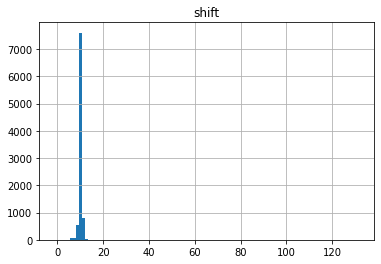

In [ ]:
df.hist('shift', bins=100)

array([[<AxesSubplot:title={'center':'shift'}>]], dtype=object)

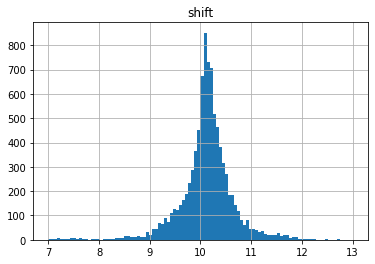

In [ ]:
df.hist('shift', range=(7,13), bins=100)

In [ ]:
#samples = df['shift'].between(7, 13).tolist()
df2 = df.loc[(df['shift'] > 7) & (df['shift'] < 13)]
samples = df2['shift'].tolist()
#op = df.loc[(df['Height'] > 70) & (df['Weight'] > 160)]

In [ ]:
r = stats.describe(samples)
r

DescribeResult(nobs=9036, minmax=(7.0089999999999995, 12.94), mean=10.117424140770252, variance=0.2967401592759905, skewness=-0.6739311563657784, kurtosis=5.411165638404471)

In [ ]:
(mu, sigma) = stats.norm.fit(samples)
print("Chemical Shift Mean: {0:.2f} ± {1:.2f} ppm".format(mu, sigma))

Chemical Shift Mean: 10.12 ± 0.54 ppm


"Normal" probability density function: $f(x)= \frac{exp(-x^2/2)}{\sqrt{ 2 \pi}}$

(7.0, 14.0)

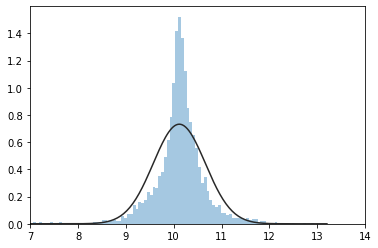

In [ ]:
ax = sns.distplot(samples, bins=100, kde=False, fit=stats.norm)
ax.set_xlim([7,14])
#plt.savefig('figure', dpi=150)

(7.0, 14.0)

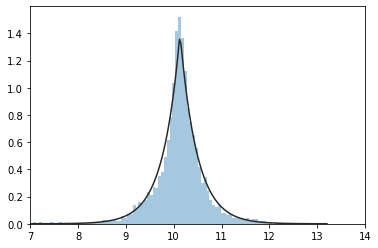

In [ ]:
ax = sns.distplot(samples, bins=100, kde=False, fit=stats.laplace)
ax.set_xlim([7,14])
